In [1]:
from astropy.io import fits
import numpy as np
import healpy as hp
import coop_setup_funcs as csf
import coop_post_processing as cpp
import matplotlib.pyplot as plt
import h5py
import os

# For DESI

Mean of number density map:  0.13280751059324133
Mean of overdensity map:  -0.0008784438492648304


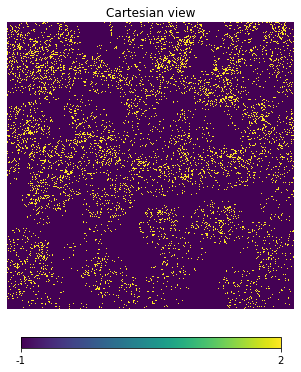

In [68]:
# total weights
mask = hp.read_map("/mnt/raid-cita/mlokken/data/masks/combined_desibright_act070shr1_hpx.fits")
# downgrade
mask = hp.ud_grade(mask, 1024)
fracmask_path = None
catfile   = "/mnt/raid-cita/mlokken/data/desi/LRG_clustering.dat.fits"
outpath   = "/mnt/raid-cita/mlokken/data/number_density_maps/desi/"
mass_str  = ''
with fits.open(catfile) as cat:
    catlen = len(cat[1].data)
    ra, dec, z, w = cat[1].data['ra'], cat[1].data['dec'], cat[1].data['z'], cat[1].data['weight']
# limit z
inz = (z > 0.6) & (z < .7)
ra, dec, z, w = ra[inz], dec[inz], z[inz], w[inz]
theta,phi = csf.DeclRatoThetaPhi(dec,ra)
ndmap = csf.get_od_map(1024, theta, phi, mask, None, 0, w)
hp.cartview(ndmap, lonra=[-10,10], latra=[-10,10], min=-1, max=2)

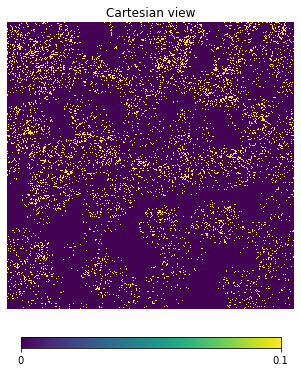

<Figure size 432x288 with 0 Axes>

In [101]:
map1   = np.zeros((hp.nside2npix(1024)))
pix = hp.ang2pix(1024,theta,phi)
np.add.at(map1, pix, w)
cart1 = hp.cartview(map1, max=.1, lonra=[-10,10], latra=[-10,10], return_projected_map=True)
plt.show()
plt.clf()

In [102]:
cart1[100:200,100:200]

masked_array(
  data=[[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.41155774, 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.41155774, 0.41155774, 0.41155774, ..., 0.        , 0.        ,
         0.        ],
        ...,
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ]],
  mask=False,
  fill_value=-1.6375e+30)

In [103]:
cart2[100:200,100:200]

masked_array(
  data=[[0., 0., 0., ..., 0., 0., 0.],
        [0., 1., 0., ..., 0., 0., 0.],
        [1., 1., 1., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],
  mask=False,
  fill_value=-1.6375e+30)

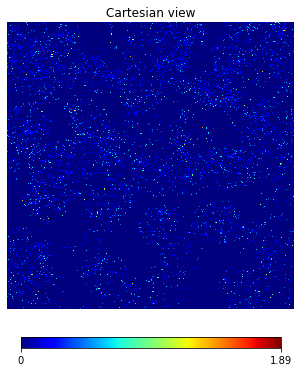

In [107]:
# make a plot of the weights on the sky
empty_map = np.zeros(hp.nside2npix(1024))
empty_map[pix] = w
weightmap = hp.cartview(empty_map, lonra=[-10,10], latra=[-10,10], cmap = 'jet', return_projected_map=True)


In [109]:
weightmap[100:200,100:200]

masked_array(
  data=[[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.41155774, 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.41155774, 0.41155774, 0.41155774, ..., 0.        , 0.        ,
         0.        ],
        ...,
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ]],
  mask=False,
  fill_value=-1.6375e+30)

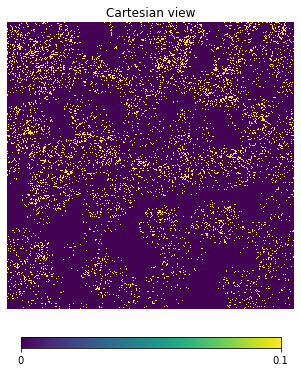

<Figure size 432x288 with 0 Axes>

In [96]:
map2   = np.zeros((hp.nside2npix(1024)))
pix = hp.ang2pix(1024,theta,phi)
np.add.at(map2, pix, 1)
cart2 = hp.cartview(map2, max=.1, lonra=[-10,10], latra=[-10,10], return_projected_map=True)
plt.show()
plt.clf()

In [86]:
np.sum(map1 == map2) / len(map1)

0.9766640663146973

In [94]:
np.sum(cart1.flatten() == cart2.flatten()) / cart1.size

0.9176328125

Mean of number density map:  0.01888696687415366
Mean of overdensity map:  -0.0009110126487406983


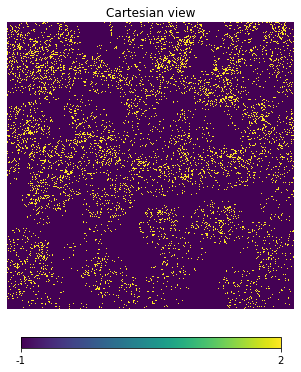

In [69]:
# fkp weights
with fits.open(catfile) as cat:
    catlen = len(cat[1].data)
    ra, dec, z, w = cat[1].data['ra'], cat[1].data['dec'], cat[1].data['z'], cat[1].data['weight_fkp']
# limit z
inz = (z > 0.6) & (z < .7)
ra, dec, z, w = ra[inz], dec[inz], z[inz], w[inz]
theta,phi = csf.DeclRatoThetaPhi(dec,ra)
ndmap = csf.get_od_map(1024, theta, phi, mask, None, 0, w)
hp.cartview(ndmap, lonra=[-10,10], latra=[-10,10], min=-1, max=2)

(array([2.71602e+05, 5.05680e+04, 9.42300e+03, 2.08400e+03, 5.54000e+02,
        1.73000e+02, 5.20000e+01, 2.60000e+01, 5.00000e+00, 1.00000e+00]),
 array([0.17709768, 0.40969276, 0.64228783, 0.87488291, 1.10747799,
        1.34007306, 1.57266814, 1.80526322, 2.03785829, 2.27045337,
        2.50304845]),
 <BarContainer object of 10 artists>)

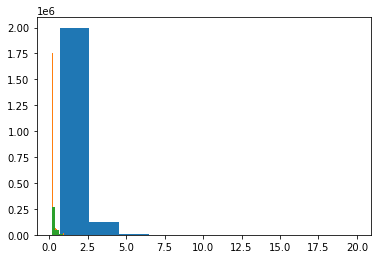

In [73]:
plt.hist(w1)
plt.hist(w2)
plt.hist(w)

Mean of number density map:  0.026382058524859583
Mean of overdensity map:  -0.0008785173031410078


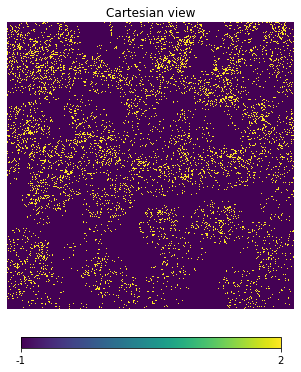

In [70]:
# combined weights
with fits.open(catfile) as cat:
    catlen = len(cat[1].data)
    ra, dec, z, w1 = cat[1].data['ra'], cat[1].data['dec'], cat[1].data['z'], cat[1].data['weight']
    w2 = cat[1].data['weight_fkp']
w = w1 * w2
# limit z
inz = (z > 0.6) & (z < .7)
ra, dec, z, w = ra[inz], dec[inz], z[inz], w[inz]
theta,phi = csf.DeclRatoThetaPhi(dec,ra)
ndmap = csf.get_od_map(1024, theta, phi, mask, None, 0, w)
hp.cartview(ndmap, lonra=[-10,10], latra=[-10,10], min=-1, max=2)

In [52]:
mask[mask<0.8] = 0
mask[mask>.8] = 1

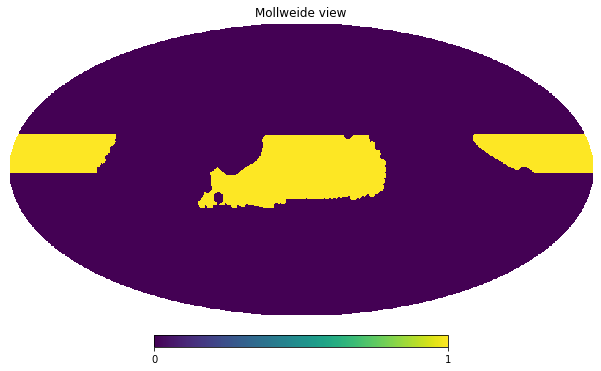

In [53]:
hp.mollview(mask)

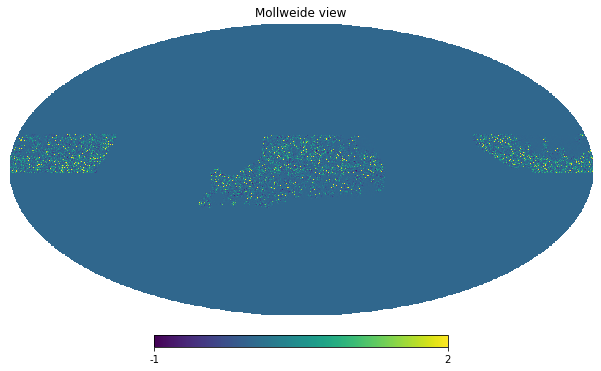

In [18]:

with fits.open(catfile) as cat:
    catlen = len(cat[1].data)
    ra, dec, z, w = cat[1].data['ra'], cat[1].data['dec'], cat[1].data['z'], cat[1].data['weight_comp']
# limit z
inz = (z > 0.6) & (z < .7)
ra, dec, z, w = ra[inz], dec[inz], z[inz], w[inz]
theta,phi = csf.DeclRatoThetaPhi(dec,ra)
ndmap = csf.get_nd_map(1024, theta, phi, mask, None, 5, w)
hp.mollview(ndmap, min=-1, max=2)

In [9]:
# Buzz
fracmask_path = "/mnt/raid-cita/mlokken/data/masks/y3_gold_2.2.1_RING_joint_redmagic_v0.5.1_wide_maglim_v2.2_mask_fracgood_hpx_4096.fits"
mask_path = "/mnt/raid-cita/mlokken/data/masks/y3_gold_2.2.1_RING_joint_redmagic_v0.5.1_wide_maglim_v2.2_mask_hpx_4096.fits"
catpath   = "/mnt/raid-cita/mlokken/buzzard/catalogs/"


mass_str  = ''
ra   = []
dec  = []
z    = []
catlen = 0
for catfile in os.listdir(catpath):
    if catfile.startswith("maglim_buzz_Ndensity"):
        print(catfile)
        with fits.open(os.path.join(catpath,catfile)) as cat:
            ra.extend(cat[1].data['ra'])
            dec.extend(cat[1].data['dec'])
            z.extend(cat[1].data['DNF_ZMEAN'])
            catlen+= len(cat[1].data)
ra  = np.asarray(ra)
dec = np.asarray(dec)
z   = np.asarray(z)
w   = np.ones(len(ra))


maglim_buzz_Ndensity_0.fits
maglim_buzz_Ndensity_3.fits
maglim_buzz_Ndensity_4.fits
maglim_buzz_Ndensity_5.fits
maglim_buzz_Ndensity_2.fits
maglim_buzz_Ndensity_1.fits


In [6]:
# Cardinal

fracmask_path = "/mnt/raid-cita/mlokken/cardinal/fracgood_band_i_nside_4096.hp"
mask_path = "/mnt/raid-cita/mlokken/cardinal/cardinal_maglim_mask.fits"
catfile   = "/mnt/raid-cita/mlokken/cardinal/maglim_Cardinal-3_v2.0_Y6a.hdf5"
mass_str  = ''
with h5py.File(catfile, 'r') as cat:
    ra, dec, z, w = cat['ra'][:], cat['dec'][:], cat['DNF_ZMEAN'][:], cat['weight'][:]
    catlen = len(ra)
cat.close()

In [2]:
# DES
fracmask_path = "/mnt/raid-cita/mlokken/data/masks/y3_gold_2.2.1_RING_joint_redmagic_v0.5.1_wide_maglim_v2.2_mask_fracgood_hpx_4096.fits"
mask_path = "/mnt/raid-cita/mlokken/data/masks/y3_gold_2.2.1_RING_joint_redmagic_v0.5.1_wide_maglim_v2.2_mask_hpx_4096.fits"
catfile   = "/mnt/raid-cita/mlokken/data/maglim/maglim_data_wflux_wmag.fits"
outpath   = "/mnt/raid-cita/mlokken/data/number_density_maps/maglim/"
mass_str  = ''
with fits.open(catfile) as cat:
    catlen = len(cat[1].data)
    ra, dec, z, w = cat[1].data['ra'], cat[1].data['dec'], cat[1].data['z_mean'], cat[1].data['weight']

In [6]:
zbins = [[0.20, 0.40], [0.40,0.55], [0.55,0.70], [0.70,0.85], [0.85,0.95], [0.95,1.05]]


In [5]:
# inz = (z < 0.4) & (z>0.2)
# inz = (z < 0.55) & (z>0.4)
# inz = (z < 0.7) & (z>0.55)
inz = (z < 0.85) & (z>0.7)

In [10]:
ra, dec, z, w = ra[inz], dec[inz], z[inz], w[inz]

In [11]:
theta,phi = csf.DeclRatoThetaPhi(dec,ra)

In [12]:
def get_nd_map(nside, theta, phi, binmask=None, fracmask=None, smth=0, wgt=1, beam='gaussian'):
    '''
    Get a number density map from a set of coordinates and weights
    Parameters:
    nside: int
        Healpix nside parameter
    theta: float array
        Declination in radians
    phi: float array
        Right ascension in radians
    binmask: float array
        Array of values to mask the map with (must be binary)
    fracmask: float array
        Array of values to correct the map for survey incompleteness
    smth: float
        Smoothing scale in arcseconds
    wgt: float array
        Array of weights for each coordinate
    beam: string
        Beam type for smoothing. Options are 'gaussian' or 'tophat'
    Returns:
    map: float array
        Number density map (smoothed or unsmoothed)
    '''
    import healpy as hp
    map   = np.zeros((hp.nside2npix(nside)))
    pix = hp.ang2pix(nside,theta,phi)
    np.add.at(map, pix, wgt)
    if fracmask is not None:
        map[fracmask>0] = map[fracmask>0]/fracmask[fracmask>0] # correct for survey incompleteness
    if binmask is not None:
        map = map * binmask # ensure no values where sky was totally unobserved
    if smth != 0:
        if beam=='gaussian':
            map = hp.sphtfunc.smoothing(map, fwhm = np.deg2rad(smth/3600.), pol=False)
        elif beam=='tophat':
            map = hp.sphtfunc.smoothing(map, fwhm = np.deg2rad(smth/3600.), pol=False, beam_window=tophat_beam(smth/3600.))
        if binmask is not None:
            map = map * binmask # ensure no values where sky was totally unobserved
    return map

In [13]:
def get_od_map(nside, theta, phi, binmask=None, fracmask=None, smth=0, wgt=1, beam='gaussian'): # smoothing scale in arcsec
    '''
    Get a number density map from a set of coordinates and weights
    Parameters:
    nside: int
        Healpix nside parameter
    theta: float array
        Declination in radians
    phi: float array
        Right ascension in radians
    binmask: float array
        Array of values to mask the map with (must be binary)
    fracmask: float array
        Array of values to correct the map for survey incompleteness
    smth: float
        Smoothing scale in arcseconds
    wgt: float array
        Array of weights for each coordinate
    beam: string
        Beam type for smoothing. Options are 'gaussian' or 'tophat'
    Returns:
    map: float array
        Number density map (smoothed or unsmoothed)
    '''
    import healpy as hp
    map   = np.zeros((hp.nside2npix(nside)))
    pix = hp.ang2pix(nside,theta,phi)
    np.add.at(map, pix, wgt)
    if fracmask is not None:
        map[fracmask>0] = map[fracmask>0]/fracmask[fracmask>0] # correct for survey incompleteness
    if binmask is not None:
        map = map * binmask
        npix = sum(binmask)
    else:
        npix = hp.nside2npix(nside)
    mean = sum(map)/npix
    newmap   = map/mean - 1
    if binmask is not None:
        newmap = newmap * binmask
    print("Mean of number density map: ", mean)
    print("Mean of overdensity map: ", sum(newmap)/npix)
    if smth != 0:
        if beam=='gaussian':
            newmap = hp.sphtfunc.smoothing(newmap, fwhm = np.deg2rad(smth/3600.), pol=False)
        elif beam=='tophat':
            newmap = hp.sphtfunc.smoothing(newmap, fwhm = np.deg2rad(smth/3600.), pol=False, beam_window=tophat_beam(smth/3600.))
        if binmask is not None:
            newmap = newmap * binmask # ensure no values where sky was totally unobserved
    return newmap

In [14]:
fracmask = hp.read_map(fracmask_path)

In [15]:
odmap = get_od_map(4096, theta, phi, hp.read_map(mask_path), hp.read_map(fracmask_path), 0, wgt=w)


Mean of number density map:  0.10769796641734249
Mean of overdensity map:  1.0406712379434329e-13


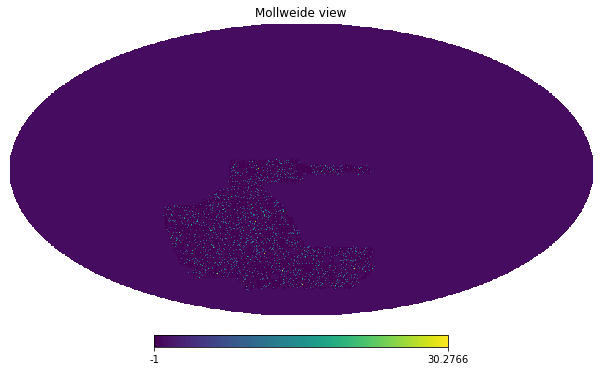

In [16]:
hp.mollview(odmap)

In [17]:
odmap_old = get_od_map(4096, theta,phi, hp.read_map(mask_path), smth=0, wgt=w)

Mean of number density map:  0.10655341529633096
Mean of overdensity map:  -7.10206501786655e-15


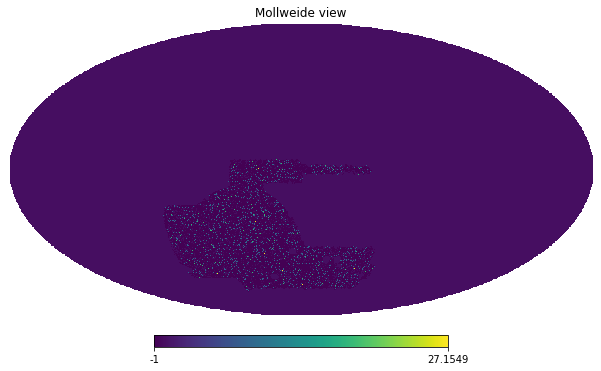

In [18]:
hp.mollview(odmap_old)

/tmp/ipykernel_1144772/2051501879.py:1: RuntimeWarning: invalid value encountered in true_divide
  hp.mollview(odmap/odmap_old)


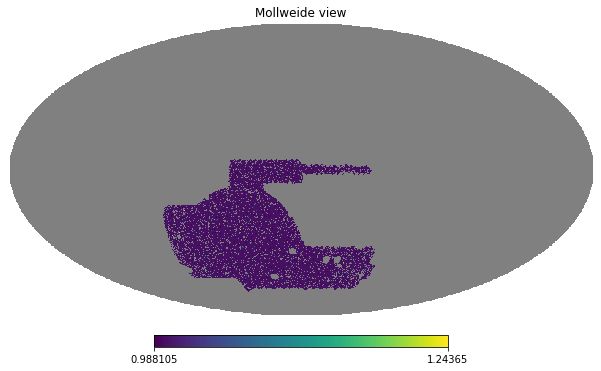

In [19]:
hp.mollview(odmap/odmap_old)

In [20]:
map = get_nd_map(4096, theta, phi, hp.read_map(mask_path), hp.read_map(fracmask_path), 0, wgt=w)


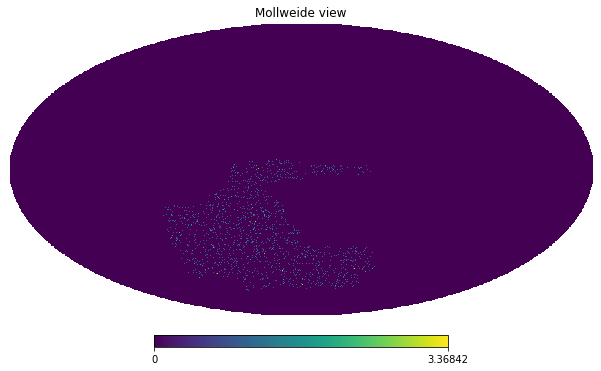

In [21]:
hp.mollview(map)

In [22]:
map2 = get_nd_map(4096, theta, phi, hp.read_map(mask_path), np.zeros(12*4096**2), smth=0, wgt=w)


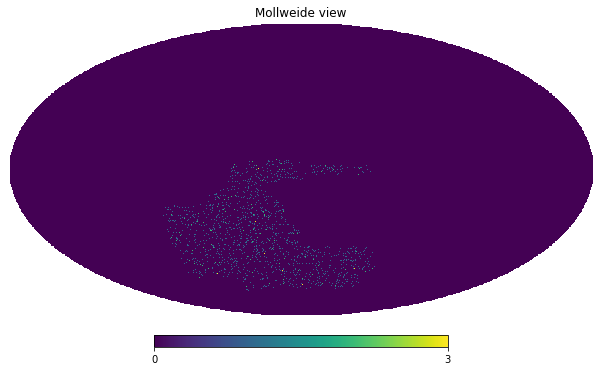

In [23]:
hp.mollview(map2)

/tmp/ipykernel_1144772/2472068877.py:1: RuntimeWarning: invalid value encountered in true_divide
  hp.mollview(map/map2)


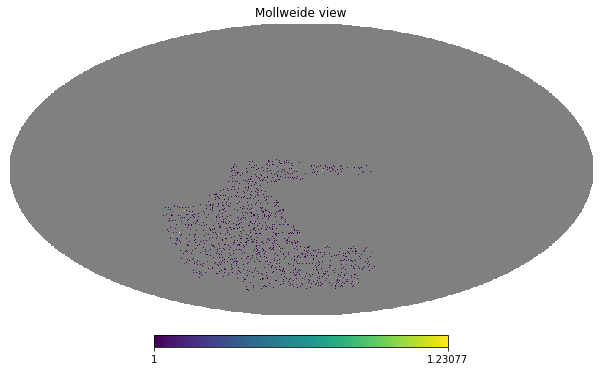

In [24]:
hp.mollview(map/map2)

In [47]:
# compute the number density of galaxies
npix_covered = len(map[fracmask!=0])
area_per_pix = hp.nside2pixarea(4096, degrees=True)

sqarcmin_per_sqdeg = 60**2
np.average(map[fracmask!=0])/area_per_pix/sqarcmin_per_sqdeg

0.14559185532237168

In [48]:
# compute the number density of galaxies
npix_covered = len(map2[fracmask!=0])
area_per_pix = hp.nside2pixarea(4096, degrees=True)

sqarcmin_per_sqdeg = 60**2
np.average(map2[fracmask!=0])/area_per_pix/sqarcmin_per_sqdeg

0.14387650931014784

In [101]:
# bin 1: 0.14988 vs 0.148
# bin 2: 0.107 vs 0.105